In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
#import shap

## Lectura de Datasets

### Academico Dataset

In [83]:
dataset = 'academico_'
file = f'../data/{dataset}.csv'
df_academico = pd.read_csv(file)

C:\Users\jange\AppData\Local\Temp\ipykernel_15804\3250444663.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_academico = pd.read_csv(file)


In [84]:
df_academico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93063 entries, 0 to 93062
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AÑO                    93063 non-null  int64 
 1   region_ie              93063 non-null  object
 2   provincia_ie           93063 non-null  object
 3   ugel_ie                93063 non-null  object
 4   distrito_ie            93063 non-null  object
 5   centropoblado_ie       93063 non-null  object
 6   institucion_educativa  93063 non-null  object
 7   codigolocal_ie         93063 non-null  int64 
 8   codigomodular_ie       93063 non-null  int64 
 9   ruralidad              93063 non-null  object
 10  estudiantes            93063 non-null  object
 11  grado                  93063 non-null  object
 12  periodo                93063 non-null  object
 13  curso                  93063 non-null  object
 14  comp                   93063 non-null  object
 15  nivel_de_logro     

In [85]:
df_academico_columns = df_academico.columns
df_academico_columns

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'estudiantes', 'grado', 'periodo',
       'curso', 'comp', 'nivel_de_logro', 'dni_participante',
       'id_participante', 'participante', 'coordinador_a', 'programa',
       'año_pdl', 'socios'],
      dtype='object')

In [86]:
df_academico_ID_Participante = df_academico['id_participante'].unique()
print(len(df_academico_ID_Participante))

687


### Clima de Aula Dataset

In [87]:
dataset = 'clima_aula_'
file = f'../data/{dataset}.csv'
df_clima_aula = pd.read_csv(file)

In [88]:
df_clima_aula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AÑO                    13200 non-null  int64 
 1   region_ie              13200 non-null  object
 2   provincia_ie           13200 non-null  object
 3   ugel_ie                13200 non-null  object
 4   distrito_ie            13200 non-null  object
 5   centropoblado_ie       13200 non-null  object
 6   institucion_educativa  13200 non-null  object
 7   codigolocal_ie         13200 non-null  int64 
 8   codigomodular_ie       13200 non-null  int64 
 9   ruralidad              13200 non-null  object
 10  grado                  13200 non-null  object
 11  periodo                13200 non-null  object
 12  evaluacion             13200 non-null  object
 13  elemento               13200 non-null  object
 14  porcentaje_positivas   13175 non-null  object
 15  nivel_de_logro     

In [89]:
df_clima_aula_columns = df_clima_aula.columns
df_clima_aula_columns

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'grado', 'periodo', 'evaluacion',
       'elemento', 'porcentaje_positivas', 'nivel_de_logro',
       'dni_participante', 'id_participante', 'participante', 'coordinador_a',
       'programa', 'año_pdl', 'socios'],
      dtype='object')

In [90]:
df_clima_aula_ID_Participante = df_clima_aula['id_participante'].unique()
print(len(df_clima_aula_ID_Participante))

449


### Socio-emocional Dataset

In [91]:
dataset = 'socioemocional_'
file = f'../data/{dataset}.csv'
df_socioemocional = pd.read_csv(file)

C:\Users\jange\AppData\Local\Temp\ipykernel_15804\3190278524.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_socioemocional = pd.read_csv(file)


In [92]:
df_socioemocional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341245 entries, 0 to 341244
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AÑO                    341245 non-null  int64  
 1   region_ie              341245 non-null  object 
 2   provincia_ie           341245 non-null  object 
 3   ugel_ie                341245 non-null  object 
 4   distrito_ie            341245 non-null  object 
 5   centropoblado_ie       341245 non-null  object 
 6   institucion_educativa  341245 non-null  object 
 7   codigolocal_ie         341245 non-null  int64  
 8   codigomodular_ie       341245 non-null  int64  
 9   ruralidad              341245 non-null  object 
 10  id_estudiante          341245 non-null  object 
 11  grado                  341245 non-null  object 
 12  periodo                341245 non-null  object 
 13  evaluación             341245 non-null  object 
 14  habilidad              341245 non-nu

In [93]:
df_socioemocional_columns = df_socioemocional.columns
df_socioemocional_columns

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'id_estudiante', 'grado', 'periodo',
       'evaluación', 'habilidad', 'promedio', 'nivel_de_logro',
       'dni_participante', 'id_participante', 'participantes_sección',
       'coordinador_a', 'programa', 'año_pdl', 'socios'],
      dtype='object')

In [94]:
df_socioemocional_ID_Participante = df_socioemocional['id_participante'].unique()
print(len(df_socioemocional_ID_Participante))

450


## Agrupamiento y Transformación de Datos

ACADEMICO - Eliminar registros con valores nulos en esos 3 Primary keys

In [95]:
df_academico.isnull().sum()

AÑO                         0
region_ie                   0
provincia_ie                0
ugel_ie                     0
distrito_ie                 0
centropoblado_ie            0
institucion_educativa       0
codigolocal_ie              0
codigomodular_ie            0
ruralidad                   0
estudiantes                 0
grado                       0
periodo                     0
curso                       0
comp                        0
nivel_de_logro              0
dni_participante           64
id_participante             0
participante                0
coordinador_a               0
programa                    0
año_pdl                     0
socios                   7668
dtype: int64

In [96]:
df_socioemocional.isnull().sum()

AÑO                       0
region_ie                 0
provincia_ie              0
ugel_ie                   0
distrito_ie               0
centropoblado_ie          0
institucion_educativa     0
codigolocal_ie            0
codigomodular_ie          0
ruralidad                 0
id_estudiante             0
grado                     0
periodo                   0
evaluación                0
habilidad                 0
promedio                  0
nivel_de_logro            0
dni_participante         38
id_participante           0
participantes_sección     0
coordinador_a             0
programa                  0
año_pdl                   0
socios                    0
dtype: int64

In [97]:
df_clima_aula.isnull().sum()

AÑO                       0
region_ie                 0
provincia_ie              0
ugel_ie                   0
distrito_ie               0
centropoblado_ie          0
institucion_educativa     0
codigolocal_ie            0
codigomodular_ie          0
ruralidad                 0
grado                     0
periodo                   0
evaluacion                0
elemento                  0
porcentaje_positivas     25
nivel_de_logro            0
dni_participante         14
id_participante           0
participante              0
coordinador_a             0
programa                  0
año_pdl                   0
socios                    0
dtype: int64

In [98]:
columns_to_check = ["codigomodular_ie", "grado", "id_participante"]
cleaned_df_aca = df_academico.dropna(subset=columns_to_check)
cleaned_df_aca.id_participante.nunique()

687

In [99]:
cleaned_df_aca.columns

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'estudiantes', 'grado', 'periodo',
       'curso', 'comp', 'nivel_de_logro', 'dni_participante',
       'id_participante', 'participante', 'coordinador_a', 'programa',
       'año_pdl', 'socios'],
      dtype='object')

ACADEMICO - Agrupar por las siguientes columnas y tomar la moda de la variable `Nivel de logro`

In [100]:
group_cols = ['codigomodular_ie', 'periodo','id_participante']

In [101]:
# Asegurar que los nombres de columnas en group_cols existan en el DataFrame
group_cols = [col.strip() for col in group_cols]  # Elimina espacios extra

# Verificar nombres reales de columnas en cleaned_df_aca
print(cleaned_df_aca.columns)

# Renombrar columnas eliminando espacios extra si existen
cleaned_df_aca.columns = cleaned_df_aca.columns.str.strip()

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'estudiantes', 'grado', 'periodo',
       'curso', 'comp', 'nivel_de_logro', 'dni_participante',
       'id_participante', 'participante', 'coordinador_a', 'programa',
       'año_pdl', 'socios'],
      dtype='object')


In [102]:
# Aplicar el groupby
if "nivel_de_logro" in cleaned_df_aca.columns:
    result_aca = cleaned_df_aca.groupby(group_cols)["nivel_de_logro"].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else None
    ).reset_index()
else:
    print("Error: La columna 'nivel_de_logro' no existe en el DataFrame.")

In [103]:
result_aca

,codigomodular_ie,periodo,id_participante,nivel_de_logro
0,211797,Diciembre 2024,doc00009,Satisfactorio
1,211797,Marzo 2024,doc00009,Satisfactorio
2,211805,Diciembre 2024,doc00115,En inicio
3,211805,Diciembre 2024,doc00116,En inicio
4,211805,Diciembre 2024,doc00117,Satisfactorio
...,...,...,...,...
1497,1775386,Julio 2023,1812a66c,Satisfactorio
1498,1775386,Marzo 2023,1812a66c,Satisfactorio
1499,1794627,Diciembre 2023,b29b3bb3,Satisfactorio
1500,1794627,Julio 2023,b29b3bb3,Satisfactorio


SOCIOEMOCIONAL - Eliminar registros con valores nulos en esos 3 Primary keys

In [104]:
columns_to_check = ["codigomodular_ie", "grado", "id_participante"]
cleaned_df_soc = df_socioemocional.dropna(subset=columns_to_check)
cleaned_df_soc.id_participante.nunique()

450

In [105]:
cleaned_df_soc[cleaned_df_soc.periodo == "Marzo 2023"].habilidad.value_counts()

habilidad
Autocuidado                                       3223
Autoestima                                        3058
Conciencia emocional                              2492
Comunicación asertiva                             2242
Trabajo en equipo                                 2241
Toma de decisiones responsables                   2240
Regulación emocional                              2238
Resolución de conflictos                          2237
Conciencia social                                 2236
Empatía                                           2233
Comportamiento prosocial                          2233
Autoconcepto                                      2192
Limitados recursos económicos                     1478
Limitada expectativa sobre la educación           1477
Violencia escolar                                 1476
Violencia familiar                                1476
Consumo de alcohol y drogas                       1475
Desinformación sobre educación sexual integral    1475


SOCIOEMOCIONAL - Agrupar por las columnas anteriores, transformar por Habilidad y tomar la moda de la variable `Nivel de logro` por cada Habilidad

In [106]:
result_soc = cleaned_df_soc.pivot_table(
    index=group_cols,
    columns="habilidad",
    values="nivel_de_logro",
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

In [107]:
result_soc.columns.name = None
result = result_soc.rename_axis(None, axis=1)
result

,codigomodular_ie,periodo,id_participante,Ausentismo y deserción escolar,Autoconcepto,Autocuidado,Autoestima,Comportamiento prosocial,Comunicación asertiva,Conciencia emocional,...,Limitados recursos económicos,Percepción sobre estereotipos de género,Regulación emocional,Resolución de conflictos,Toma de decisiones responsables,Trabajo adolescente,Trabajo en equipo,Violencia de género,Violencia escolar,Violencia familiar
0,214148,Julio 2024,b6fa379d-ffce-4df3-9747-2f8d530f4b6a,NaN,NaN,Satisfactorio,Satisfactorio,NaN,NaN,Satisfactorio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,214155,Marzo 2024,4c3dbec4-c143-4c96-9c3b-10e2119feb74,Riesgo moderado,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,En proceso,...,Riesgo moderado,NaN,En proceso,Satisfactorio,Satisfactorio,Riesgo moderado,Satisfactorio,Riesgo moderado,Riesgo moderado,Riesgo moderado
2,217133,Diciembre 2023,b29b2894,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,En proceso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,217133,Julio 2023,b29b2894,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,En proceso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,217133,Julio 2024,b29b28942024,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,En proceso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1749902,Marzo 2024,b29b5e432024,NaN,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,En proceso,NaN,...,NaN,NaN,Satisfactorio,En inicio,En proceso,NaN,En proceso,NaN,NaN,NaN
1090,1794627,Diciembre 2024,b29b3bb32024,Bajo Riesgo,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,...,Riesgo moderado,NaN,Satisfactorio,Satisfactorio,Satisfactorio,Bajo Riesgo,Satisfactorio,Bajo Riesgo,Bajo Riesgo,Riesgo moderado
1091,1794627,Julio 2024,b29b3bb32024,Bajo Riesgo,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,...,Riesgo moderado,NaN,Satisfactorio,Satisfactorio,Satisfactorio,Riesgo moderado,Satisfactorio,Riesgo moderado,Bajo Riesgo,Bajo Riesgo
1092,1794627,Marzo 2024,b29b3bb32024,Riesgo moderado,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,Satisfactorio,...,Riesgo moderado,NaN,Satisfactorio,Satisfactorio,Satisfactorio,Riesgo moderado,Satisfactorio,Riesgo moderado,Riesgo moderado,Riesgo moderado


CLIMA DE AULA - Eliminar registros con valores nulos en esos 3 Primary keys

In [108]:
columns_to_check = ["codigomodular_ie", "grado", "id_participante"]
cleaned_df_cli = df_clima_aula.dropna(subset=columns_to_check)
cleaned_df_cli.id_participante.nunique()

449

In [109]:
cleaned_df_cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AÑO                    13200 non-null  int64 
 1   region_ie              13200 non-null  object
 2   provincia_ie           13200 non-null  object
 3   ugel_ie                13200 non-null  object
 4   distrito_ie            13200 non-null  object
 5   centropoblado_ie       13200 non-null  object
 6   institucion_educativa  13200 non-null  object
 7   codigolocal_ie         13200 non-null  int64 
 8   codigomodular_ie       13200 non-null  int64 
 9   ruralidad              13200 non-null  object
 10  grado                  13200 non-null  object
 11  periodo                13200 non-null  object
 12  evaluacion             13200 non-null  object
 13  elemento               13200 non-null  object
 14  porcentaje_positivas   13175 non-null  object
 15  nivel_de_logro     

CLIMA DE AULA - Agrupar por las columnas anteriores, transformar por Elemento y tomar la moda de la variable `Nivel de logro` por cada Elemento

In [110]:
result_cli = cleaned_df_cli.pivot_table(
    index=group_cols,
    columns="elemento",
    values="nivel_de_logro",
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

In [111]:
result_cli.columns.name = None
result_cli = result_cli.rename_axis(None, axis=1)
result_cli

,codigomodular_ie,periodo,id_participante,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,214148,Diciembre 2024,b6fa379d-ffce-4df3-9747-2f8d530f4b6a,En proceso,En proceso,En proceso,En inicio,En proceso,En proceso,En proceso
1,214155,Marzo 2024,4c3dbec4-c143-4c96-9c3b-10e2119feb74,En proceso,En proceso,En inicio,En inicio,En inicio,En inicio,En proceso
2,217133,Diciembre 2023,b29b2894,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,Satisfactorio
3,217133,Julio 2023,b29b2894,En proceso,En proceso,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso
4,217133,Marzo 2023,b29b2894,En proceso,En proceso,En inicio,En inicio,En inicio,En inicio,En inicio
...,...,...,...,...,...,...,...,...,...,...
1179,1794627,Diciembre 2024,b29b3bb32024,En inicio,En inicio,En proceso,En inicio,En proceso,En inicio,En inicio
1180,1794627,Julio 2023,b29b3bb3,Satisfactorio,Satisfactorio,Satisfactorio,En inicio,En proceso,En proceso,En proceso
1181,1794627,Julio 2024,b29b3bb32024,En inicio,En proceso,En inicio,En inicio,En inicio,En proceso,En proceso
1182,1794627,Marzo 2023,b29b3bb3,Satisfactorio,Satisfactorio,Satisfactorio,En inicio,En proceso,En proceso,Satisfactorio


In [112]:
result_cli.isnull().sum()

codigomodular_ie                                            0
periodo                                                     0
id_participante                                             0
Aprendizaje completamente interiorizado                     0
Comprensión comprobada y asegurada                          0
Expectativas rigurosas mantenidas                           0
Se crea una cultura positiva y un entorno de aprendizaje    0
Se establece un entorno de aprendizaje atractivo            0
Se fomentan relaciones alentadoras y de apoyo               0
Se valoran los aportes y las ideas de los estudiantes       0
dtype: int64

In [113]:
result_cli.shape

(1184, 10)

## Evaluacion Programas

In [114]:
dataset = 'evaluaciones'
file = f'../data/{dataset}.csv'
df_evaluaciones = pd.read_csv(file)

In [115]:
df_evaluaciones.head()

,codigomodular_ie,periodo,ID PARTICIPANTE,participante,habilidad,PUNTAJE
0,211961,2024-12-01 00:00:00,NaN,"OBANDO LEÓN, EDGAR MANUEL",Planificación y Facilitación del Aprendizaje,Desarrollado
1,212001,2024-07-01 00:00:00,NaN,"FERNANDEZ FLORIAN, EDWIN MARTIN",Planificación y Facilitación del Aprendizaje,Desarrollado
2,214148,2024-03-01 00:00:00,NaN,"LEÓN DÍAZ DE VELÁSQUEZ, LOIDA MARLENY",Planificación y Facilitación del Aprendizaje,Desarrollado
3,214155,2024-03-01 00:00:00,NaN,"TOUZET BARRENA , LOURDES ESPERANZA",Transformación y Desarrollo Educativo,En Proceso
4,214189,2024-03-01 00:00:00,NaN,"URQUIZO NAVARRO , PERCY JAVIER",Liderazgo y Gestión de Equipos,En Proceso


In [116]:
df_evaluaciones.columns = df_evaluaciones.columns.str.strip()  # Remove extra spaces/tabs
df_evaluaciones = df_evaluaciones.rename(columns={'ID PARTICIPANTE': 'id_participante', 'PUNTAJE': 'nivel_de_logro'})

In [117]:
df_evaluaciones.columns

Index(['codigomodular_ie', 'periodo', 'id_participante', 'participante',
       'habilidad', 'nivel_de_logro'],
      dtype='object')

In [118]:
import locale

# Set locale for Spanish month names
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')

# Ensure 'periodo' is a string and then attempt conversion to datetime
df_evaluaciones['periodo'] = pd.to_datetime(df_evaluaciones['periodo'], errors='coerce')

# Apply transformation only to valid datetime values
df_evaluaciones.loc[df_evaluaciones['periodo'].notna(), 'periodo'] = (
    df_evaluaciones['periodo'].dt.strftime('%B %Y').str.capitalize()
)

df_evaluaciones['periodo'].unique()

C:\Users\jange\AppData\Local\Temp\ipykernel_15804\3550563235.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Diciembre 2024' 'Julio 2024' 'Marzo 2024' 'Marzo 2024' 'Marzo 2024'
 'Marzo 2024' 'Marzo 2024' 'Julio 2024' 'Marzo 2024' 'Marzo 2024'
 'Marzo 2023' 'Marzo 2024' 'Marzo 2024' 'Marzo 2024' 'Julio 2024'
 'Marzo 2023' 'Marzo 2023' 'Diciembre 2024' 'Julio 2024' 'Marzo 2024'
 'Marzo 2024' 'Marzo 2023' 'Marzo 2023' 'Marzo 2023' 'Marzo 2023'
 'Marzo 2024' 'Marzo 2023' 'Diciembre 2024' 'Marzo 2024' 'Marzo 2024'
 'Marzo 2024' 'Diciembre 2024' 'Marzo 2024' 'Marzo 2024' 'Julio 2024'
 'Julio 2024' 'Marzo 2024' 'Marzo 2023' 'Marzo 2023' 'Marzo 2023'
 'Marzo 2023' 'Marzo 2023' 'Marzo 2024' 'Diciembre 2024' 'Marzo 2024'
 'Marzo 2024' 'Marzo 2023' 'Marzo 2023' 'Marzo 2024' 'Marzo 2024'
 'Diciembre 2024' 'Marzo 2024' 'Marzo 2024' 'Marzo 2024' 'Marzo 2023'
 'Julio 2024' 'Marzo 2024' 'Marzo 2024' 'Diciembre 20

array(['Diciembre 2024', 'Julio 2024', 'Marzo 2024', 'Marzo 2023',
       'Diciembre 2023', 'Julio 2023'], dtype=object)

In [119]:
df_evaluaciones.head(20)

,codigomodular_ie,periodo,id_participante,participante,habilidad,nivel_de_logro
0,211961,Diciembre 2024,NaN,"OBANDO LEÓN, EDGAR MANUEL",Planificación y Facilitación del Aprendizaje,Desarrollado
1,212001,Julio 2024,NaN,"FERNANDEZ FLORIAN, EDWIN MARTIN",Planificación y Facilitación del Aprendizaje,Desarrollado
2,214148,Marzo 2024,NaN,"LEÓN DÍAZ DE VELÁSQUEZ, LOIDA MARLENY",Planificación y Facilitación del Aprendizaje,Desarrollado
3,214155,Marzo 2024,NaN,"TOUZET BARRENA , LOURDES ESPERANZA",Transformación y Desarrollo Educativo,En Proceso
4,214189,Marzo 2024,NaN,"URQUIZO NAVARRO , PERCY JAVIER",Liderazgo y Gestión de Equipos,En Proceso
5,214205,Marzo 2024,NaN,"PALACIOS SHIROLA , JOSÉ ANTONIO",Liderazgo y Gestión de Equipos,Desarrollado
6,217125,Marzo 2024,NaN,"TRUJILLO DIAZ, MARIBEL",Transformación y Desarrollo Educativo,Emergente
7,217133,Julio 2024,b29b28942024,"ALTAMIRANO NUÑEZ, XIOMI ARLETT",Liderazgo y Gestión de Equipos,En Proceso
8,218669,Marzo 2024,b29b6d0b2024,"ROJAS BROUSSET, JESUS CARMELO",Liderazgo y Gestión de Equipos,NaN
9,218693,Marzo 2024,b29b3f662024,"CALIZAYA CALIZAYA, JENNY ALESSANDRA",Planificación y Facilitación del Aprendizaje,NaN


In [120]:
# Drop rows where 'periodo' is NaN, keeping other NaNs intact
df_evaluaciones = df_evaluaciones.dropna(subset=['id_participante'])
df_evaluaciones.head()

,codigomodular_ie,periodo,id_participante,participante,habilidad,nivel_de_logro
7,217133,Julio 2024,b29b28942024,"ALTAMIRANO NUÑEZ, XIOMI ARLETT",Liderazgo y Gestión de Equipos,En Proceso
8,218669,Marzo 2024,b29b6d0b2024,"ROJAS BROUSSET, JESUS CARMELO",Liderazgo y Gestión de Equipos,NaN
9,218693,Marzo 2024,b29b3f662024,"CALIZAYA CALIZAYA, JENNY ALESSANDRA",Planificación y Facilitación del Aprendizaje,NaN
10,218743,Marzo 2023,0172b861,"TORRES HUAMANI, RUDDY ESTEFANI",Planificación y Facilitación del Aprendizaje,En Proceso
11,218750,Marzo 2024,b29b40002024,"MANRIQUE MURILLO, JOSE LUIS",Planificación y Facilitación del Aprendizaje,NaN


In [121]:
df_evaluaciones.shape

(214, 6)

In [122]:
df_evaluaciones.id_participante.nunique()

202

In [123]:
df_evaluaciones.isnull().sum()

codigomodular_ie     0
periodo              0
id_participante      0
participante         0
habilidad            0
nivel_de_logro      55
dtype: int64

In [124]:
group_cols = ['codigomodular_ie', 'periodo','id_participante']

In [125]:
result_eval = df_evaluaciones.pivot_table(
    index=group_cols,
    columns="habilidad",
    values="nivel_de_logro",
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

In [126]:
result_eval.head()

habilidad,codigomodular_ie,periodo,id_participante,Bienestar y Desarrollo Socioemocional,Liderazgo y Gestión de Equipos,Planificación y Facilitación del Aprendizaje,Transformación y Desarrollo Educativo
0,217133,Julio 2024,b29b28942024,NaN,En Proceso,NaN,NaN
1,218743,Marzo 2023,0172b861,NaN,NaN,En Proceso,NaN
2,220137,Marzo 2024,b29b1c8f2024,NaN,NaN,En Proceso,NaN
3,220251,Marzo 2024,b29b301b2024,NaN,NaN,En Proceso,NaN
4,220293,Julio 2024,0172c4802024,NaN,En Proceso,NaN,NaN


In [127]:
result_eval.isnull().sum()

habilidad
codigomodular_ie                                  0
periodo                                           0
id_participante                                   0
Bienestar y Desarrollo Socioemocional           156
Liderazgo y Gestión de Equipos                  142
Planificación y Facilitación del Aprendizaje     50
Transformación y Desarrollo Educativo           129
dtype: int64

## Cruce de Tablas

Cruce por "CodigoModular_IE", "Grado", "ID_Participante" y "Fecha"

In [302]:
merged_df = pd.DataFrame()

In [322]:
merged_df = result_aca.merge(result_soc, on=["codigomodular_ie", "id_participante","periodo"], how="inner")
merged_df = merged_df.merge(result_cli, on=["codigomodular_ie", "id_participante","periodo"], how="inner")
#merged_df = merged_df.merge(result_eval, on=["codigomodular_ie", "id_participante","periodo"], how="inner")
merged_df.head()

,codigomodular_ie,periodo,id_participante,nivel_de_logro,Ausentismo y deserción escolar,Autoconcepto,Autocuidado,Autoestima,Comportamiento prosocial,Comunicación asertiva,...,Violencia de género,Violencia escolar,Violencia familiar,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,214155,Marzo 2024,4c3dbec4-c143-4c96-9c3b-10e2119feb74,En proceso,Riesgo moderado,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,...,Riesgo moderado,Riesgo moderado,Riesgo moderado,En proceso,En proceso,En inicio,En inicio,En inicio,En inicio,En proceso
1,217133,Diciembre 2023,b29b2894,Satisfactorio,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,...,NaN,NaN,NaN,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,Satisfactorio
2,217133,Julio 2023,b29b2894,Satisfactorio,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,...,NaN,NaN,NaN,En proceso,En proceso,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso
3,217133,Marzo 2023,b29b2894,En inicio,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,...,NaN,NaN,NaN,En proceso,En proceso,En inicio,En inicio,En inicio,En inicio,En inicio
4,218669,Diciembre 2023,b29b3d47,En proceso,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,...,NaN,NaN,NaN,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,Satisfactorio,Satisfactorio


Casteamos columnas a string

In [323]:
merged_df = merged_df.astype({col: str for col in merged_df.select_dtypes(include=['int64', 'float64']).columns})

In [324]:
merged_df.dtypes

codigomodular_ie                                            object
periodo                                                     object
id_participante                                             object
nivel_de_logro                                              object
Ausentismo y deserción escolar                              object
Autoconcepto                                                object
Autocuidado                                                 object
Autoestima                                                  object
Comportamiento prosocial                                    object
Comunicación asertiva                                       object
Conciencia emocional                                        object
Conciencia social                                           object
Consumo de alcohol y drogas                                 object
Creatividad                                                 object
Desinformación sobre educación sexual integral              ob

In [325]:
merged_df.shape

(659, 36)

In [326]:
for col in merged_df.columns:
    if col.endswith('_x'):
        col_y = col.replace('_x', '_y')
        if merged_df[col].equals(merged_df[col_y]):
            merged_df.drop([col_y], axis=1, inplace=True)
            merged_df = merged_df.rename(columns={col: col[:-2] })

merged_df.head()

,codigomodular_ie,periodo,id_participante,nivel_de_logro,Ausentismo y deserción escolar,Autoconcepto,Autocuidado,Autoestima,Comportamiento prosocial,Comunicación asertiva,...,Violencia de género,Violencia escolar,Violencia familiar,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,214155,Marzo 2024,4c3dbec4-c143-4c96-9c3b-10e2119feb74,En proceso,Riesgo moderado,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,...,Riesgo moderado,Riesgo moderado,Riesgo moderado,En proceso,En proceso,En inicio,En inicio,En inicio,En inicio,En proceso
1,217133,Diciembre 2023,b29b2894,Satisfactorio,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,...,NaN,NaN,NaN,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,Satisfactorio
2,217133,Julio 2023,b29b2894,Satisfactorio,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,...,NaN,NaN,NaN,En proceso,En proceso,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso
3,217133,Marzo 2023,b29b2894,En inicio,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,...,NaN,NaN,NaN,En proceso,En proceso,En inicio,En inicio,En inicio,En inicio,En inicio
4,218669,Diciembre 2023,b29b3d47,En proceso,NaN,NaN,En proceso,Satisfactorio,NaN,NaN,...,NaN,NaN,NaN,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,Satisfactorio,Satisfactorio


In [327]:
merged_df.columns

Index(['codigomodular_ie', 'periodo', 'id_participante', 'nivel_de_logro',
       'Ausentismo y deserción escolar', 'Autoconcepto', 'Autocuidado',
       'Autoestima', 'Comportamiento prosocial', 'Comunicación asertiva',
       'Conciencia emocional', 'Conciencia social',
       'Consumo de alcohol y drogas', 'Creatividad',
       'Desinformación sobre educación sexual integral', 'Empatía',
       'Entorno de riesgo', 'Limitada expectativa sobre la educación',
       'Limitada expectativa sobre su proyecto de vida',
       'Limitados recursos económicos',
       'Percepción sobre estereotipos de género', 'Regulación emocional',
       'Resolución de conflictos', 'Toma de decisiones responsables',
       'Trabajo adolescente', 'Trabajo en equipo', 'Violencia de género',
       'Violencia escolar', 'Violencia familiar',
       'Aprendizaje completamente interiorizado',
       'Comprensión comprobada y asegurada',
       'Expectativas rigurosas mantenidas',
       'Se crea una cultura pos

In [328]:
merged_df.isnull().sum()

codigomodular_ie                                              0
periodo                                                       0
id_participante                                               0
nivel_de_logro                                                0
Ausentismo y deserción escolar                              464
Autoconcepto                                                232
Autocuidado                                                   1
Autoestima                                                    9
Comportamiento prosocial                                    235
Comunicación asertiva                                       235
Conciencia emocional                                        183
Conciencia social                                           235
Consumo de alcohol y drogas                                 464
Creatividad                                                 464
Desinformación sobre educación sexual integral              476
Empatía                                 

In [329]:
(merged_df.isnull().sum()/merged_df.shape[0])*100

codigomodular_ie                                             0.000000
periodo                                                      0.000000
id_participante                                              0.000000
nivel_de_logro                                               0.000000
Ausentismo y deserción escolar                              70.409712
Autoconcepto                                                35.204856
Autocuidado                                                  0.151745
Autoestima                                                   1.365706
Comportamiento prosocial                                    35.660091
Comunicación asertiva                                       35.660091
Conciencia emocional                                        27.769347
Conciencia social                                           35.660091
Consumo de alcohol y drogas                                 70.409712
Creatividad                                                 70.409712
Desinformación sobre

In [330]:
# Calcular el porcentaje de valores nulos por columna
null_percentage = (merged_df.isnull().sum() / merged_df.shape[0]) * 100

# Filtrar columnas con menos del 70% de valores nulos
merged_df = merged_df.loc[:, null_percentage < 70]

# Mostrar las columnas restantes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   codigomodular_ie                                          659 non-null    object
 1   periodo                                                   659 non-null    object
 2   id_participante                                           659 non-null    object
 3   nivel_de_logro                                            659 non-null    object
 4   Autoconcepto                                              427 non-null    object
 5   Autocuidado                                               658 non-null    object
 6   Autoestima                                                650 non-null    object
 7   Comportamiento prosocial                                  424 non-null    object
 8   Comunicación asertiva         

In [331]:
# Eliminar columnas duplicadas basándose en el contenido
merged_df = merged_df.loc[:, ~merged_df.T.duplicated()]
merged_df.head()

,codigomodular_ie,periodo,id_participante,nivel_de_logro,Autoconcepto,Autocuidado,Autoestima,Comportamiento prosocial,Comunicación asertiva,Conciencia emocional,...,Resolución de conflictos,Toma de decisiones responsables,Trabajo en equipo,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,214155,Marzo 2024,4c3dbec4-c143-4c96-9c3b-10e2119feb74,En proceso,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,En proceso,...,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,En proceso,En inicio,En inicio,En inicio,En inicio,En proceso
1,217133,Diciembre 2023,b29b2894,Satisfactorio,NaN,En proceso,Satisfactorio,NaN,NaN,En proceso,...,NaN,NaN,NaN,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,Satisfactorio
2,217133,Julio 2023,b29b2894,Satisfactorio,NaN,En proceso,Satisfactorio,NaN,NaN,En proceso,...,NaN,NaN,NaN,En proceso,En proceso,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso
3,217133,Marzo 2023,b29b2894,En inicio,NaN,En proceso,Satisfactorio,NaN,NaN,En proceso,...,NaN,NaN,NaN,En proceso,En proceso,En inicio,En inicio,En inicio,En inicio,En inicio
4,218669,Diciembre 2023,b29b3d47,En proceso,NaN,En proceso,Satisfactorio,NaN,NaN,Satisfactorio,...,NaN,NaN,NaN,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,Satisfactorio,Satisfactorio


In [332]:
merged_df.periodo.unique()

array(['Marzo 2024', 'Diciembre 2023', 'Julio 2023', 'Marzo 2023',
       'Diciembre 2024', 'Julio 2024'], dtype=object)

In [333]:
merged_df['nivel_de_logro'].unique()

array(['En proceso', 'Satisfactorio', 'En inicio'], dtype=object)

In [334]:
merged_df.shape

(659, 23)

In [335]:
merged_df.id_participante.nunique()

283

In [336]:
def complete_participant_evaluations(df, habilidad_columns):
    """
    Ensures each participant has evaluations for all six defined periods 
    and fills missing 'habilidad' values using forward and backward fill.

    Parameters:
    df (pd.DataFrame): The input dataset with 'id_participante', 'periodo', and habilidad columns.
    habilidad_columns (list): List of habilidad columns to fill.

    Returns:
    pd.DataFrame: The completed dataset with no missing participant-period records.
    """

    # Define the six fixed periods in chronological order
    fixed_periods = ['Marzo 2023', 'Julio 2023', 'Diciembre 2023', 'Marzo 2024', 'Julio 2024', 'Diciembre 2024']

    # Get unique participants
    participants = df['id_participante'].unique()

    # Create a complete grid of (id_participante, periodo)
    full_grid = pd.MultiIndex.from_product([participants, fixed_periods], names=['id_participante', 'periodo'])
    full_df = pd.DataFrame(index=full_grid).reset_index()

    # Merge with the original dataset
    df_complete = full_df.merge(df, on=['id_participante', 'periodo'], how='left')

    # Sort by participant and period (ensuring chronological order)
    df_complete['periodo'] = pd.Categorical(df_complete['periodo'], categories=fixed_periods, ordered=True)
    df_complete = df_complete.sort_values(by=['id_participante', 'periodo'])

    # Apply forward then backward fill for habilidad columns
    df_complete[habilidad_columns] = df_complete.groupby('id_participante')[habilidad_columns].ffill().bfill()

    return df_complete

In [337]:
habilidad_cols = merged_df.columns

df_filled = complete_participant_evaluations(merged_df, habilidad_cols)

## Lead en Target

In [338]:
df_filled['nivel_de_logro_futuro'] = df_filled.groupby(['id_participante', 'codigomodular_ie'])['nivel_de_logro'].shift(-1)

In [353]:
df_filled.head()

,id_participante,periodo,codigomodular_ie,nivel_de_logro,Autoconcepto,Autocuidado,Autoestima,Comportamiento prosocial,Comunicación asertiva,Conciencia emocional,...,Toma de decisiones responsables,Trabajo en equipo,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes,nivel_de_logro_futuro
72,0088322e-ab8b-4801-9591-eead26864e64,Marzo 2023,247668,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,...,Satisfactorio,En proceso,En proceso,En proceso,En inicio,En inicio,En inicio,En proceso,Satisfactorio,En proceso
73,0088322e-ab8b-4801-9591-eead26864e64,Julio 2023,247668,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,...,Satisfactorio,En proceso,En proceso,En proceso,En inicio,En inicio,En inicio,En proceso,Satisfactorio,En proceso
74,0088322e-ab8b-4801-9591-eead26864e64,Diciembre 2023,247668,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,...,Satisfactorio,En proceso,En proceso,En proceso,En inicio,En inicio,En inicio,En proceso,Satisfactorio,En proceso
75,0088322e-ab8b-4801-9591-eead26864e64,Marzo 2024,247668,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,...,Satisfactorio,En proceso,En proceso,En proceso,En inicio,En inicio,En inicio,En proceso,Satisfactorio,En proceso
76,0088322e-ab8b-4801-9591-eead26864e64,Julio 2024,247668,En proceso,Satisfactorio,En proceso,Satisfactorio,En proceso,Satisfactorio,Satisfactorio,...,Satisfactorio,En proceso,En proceso,En proceso,En inicio,En inicio,En inicio,En proceso,Satisfactorio,En proceso


### Preprocessing

In [390]:
df = df_filled.copy()

In [391]:
nivel_mapping = {'Satisfactorio': 2, 'En proceso': 1, 'En inicio': 0}
df['nivel_de_logro'] = df['nivel_de_logro'].map(nivel_mapping).astype('Int64')

In [392]:
nivel_mapping = {'Satisfactorio': 2, 'En proceso': 1, 'En inicio': 0}
df['nivel_de_logro_futuro'] = df['nivel_de_logro_futuro'].map(nivel_mapping).astype('Int64')

In [393]:
nivel_mapping = {'Marzo 2023': 0, 'Julio 2023': 1, 'Diciembre 2023': 2, 'Marzo 2024': 3, 'Julio 2024': 4, 'Diciembre 2024': 5}
df['periodo'] = df['periodo'].map(nivel_mapping).astype('Int64')

In [394]:
target_distribution = df['nivel_de_logro_futuro'].value_counts()

In [395]:
print("Target Distribution (Original):")
print(target_distribution)

Target Distribution (Original):
nivel_de_logro_futuro
1    537
2    535
0    343
Name: count, dtype: Int64


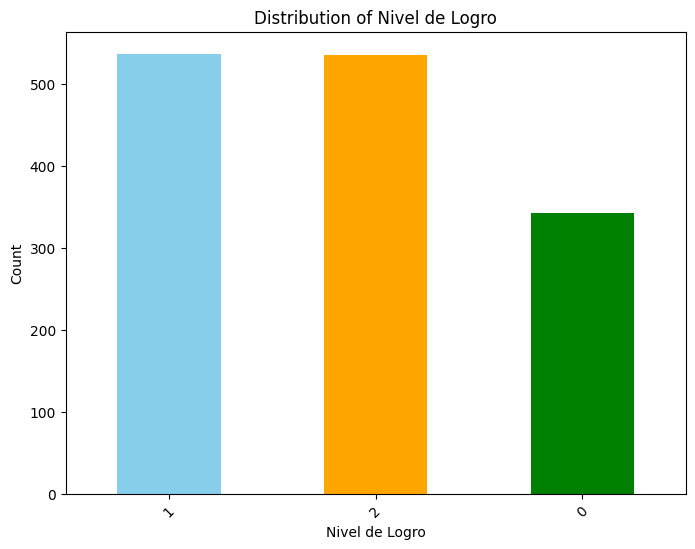

In [396]:
plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Distribution of Nivel de Logro")
plt.xlabel("Nivel de Logro")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [397]:
from sklearn.preprocessing import LabelEncoder

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1698 entries, 72 to 899
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   id_participante                                           1698 non-null   object
 1   periodo                                                   1698 non-null   Int64 
 2   codigomodular_ie                                          1698 non-null   object
 3   nivel_de_logro                                            1698 non-null   Int64 
 4   Autoconcepto                                              1698 non-null   object
 5   Autocuidado                                               1698 non-null   object
 6   Autoestima                                                1698 non-null   object
 7   Comportamiento prosocial                                  1698 non-null   object
 8   Comunicación asertiva            

In [399]:
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['periodo', 'nivel_de_logro', 'nivel_de_logro_futuro'])

label_encoders = {}  
for col in categorical_columns:
    le = LabelEncoder()
    
    df[col] = df[col].fillna('-1')
    
    df[col] = le.fit_transform(df[col])
    
    label_encoders[col] = le

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1698 entries, 72 to 899
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   id_participante                                           1698 non-null   int64
 1   periodo                                                   1698 non-null   Int64
 2   codigomodular_ie                                          1698 non-null   int64
 3   nivel_de_logro                                            1698 non-null   Int64
 4   Autoconcepto                                              1698 non-null   int64
 5   Autocuidado                                               1698 non-null   int64
 6   Autoestima                                                1698 non-null   int64
 7   Comportamiento prosocial                                  1698 non-null   int64
 8   Comunicación asertiva                      

In [401]:
df_corr = df.drop(['nivel_de_logro', 'codigomodular_ie', 'periodo', 'id_participante' ], axis=1)

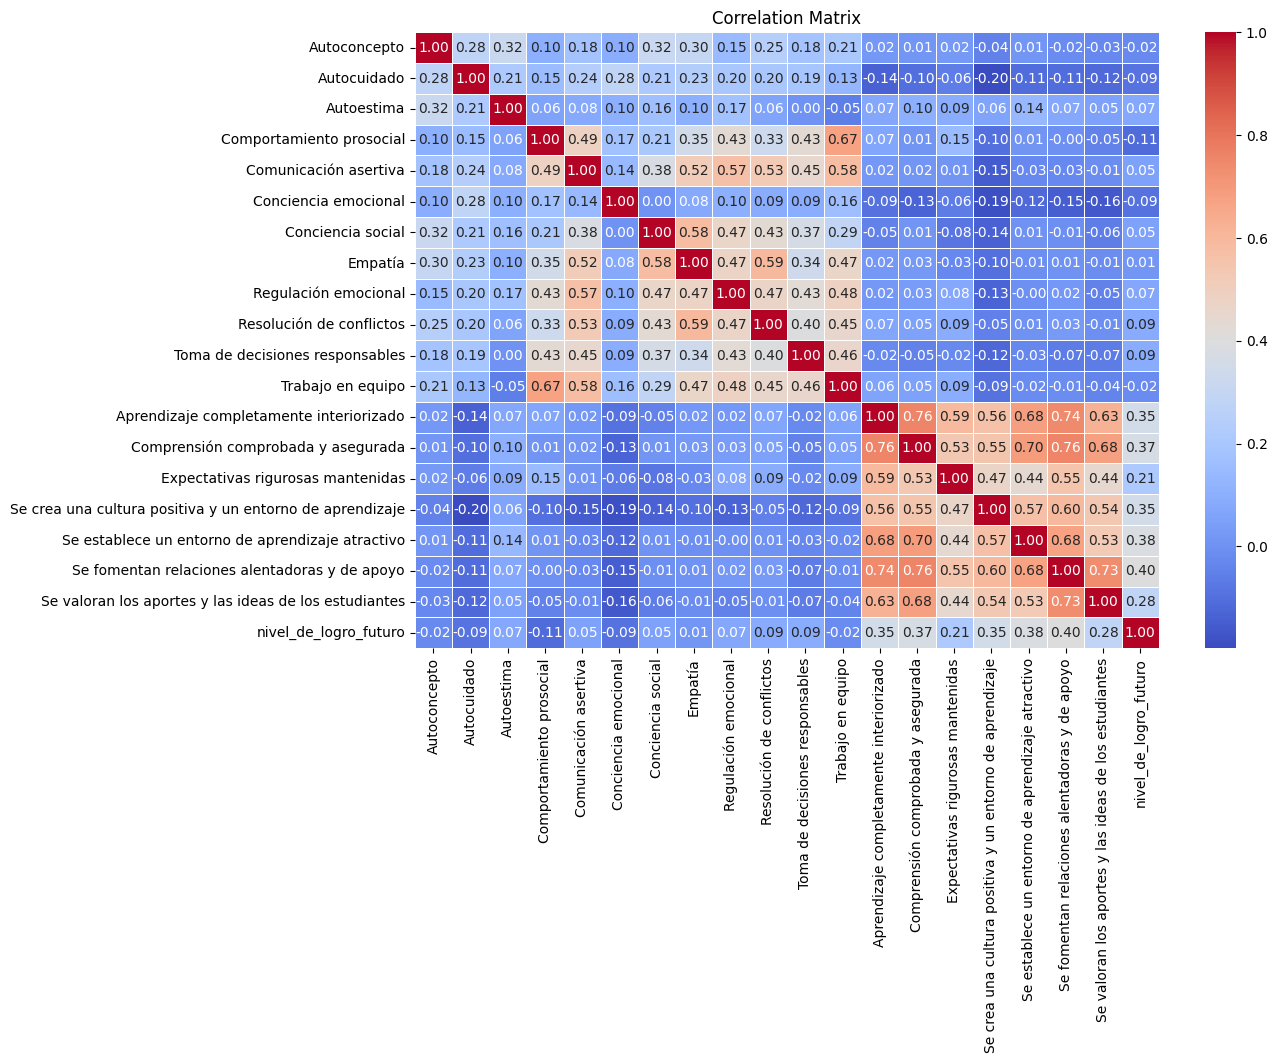

In [402]:

import seaborn as sns
import scipy.stats as stats

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [403]:
df.isnull().sum()

id_participante                                               0
periodo                                                       0
codigomodular_ie                                              0
nivel_de_logro                                                0
Autoconcepto                                                  0
Autocuidado                                                   0
Autoestima                                                    0
Comportamiento prosocial                                      0
Comunicación asertiva                                         0
Conciencia emocional                                          0
Conciencia social                                             0
Empatía                                                       0
Regulación emocional                                          0
Resolución de conflictos                                      0
Toma de decisiones responsables                               0
Trabajo en equipo                       

In [404]:
df_final = df.dropna()
df_final.shape

(1415, 24)

### Modelling

In [418]:
df_final.columns

Index(['id_participante', 'periodo', 'codigomodular_ie', 'nivel_de_logro',
       'Autoconcepto', 'Autocuidado', 'Autoestima', 'Comportamiento prosocial',
       'Comunicación asertiva', 'Conciencia emocional', 'Conciencia social',
       'Empatía', 'Regulación emocional', 'Resolución de conflictos',
       'Toma de decisiones responsables', 'Trabajo en equipo',
       'Aprendizaje completamente interiorizado',
       'Comprensión comprobada y asegurada',
       'Expectativas rigurosas mantenidas',
       'Se crea una cultura positiva y un entorno de aprendizaje',
       'Se establece un entorno de aprendizaje atractivo',
       'Se fomentan relaciones alentadoras y de apoyo',
       'Se valoran los aportes y las ideas de los estudiantes',
       'nivel_de_logro_futuro'],
      dtype='object')

Por agregar indice de fechas
Eliminar Primary keys de tablas, indices de escuela o region (se podria agrupar por regiones de calor, frio y Lima)
Esperar por la data demografica de alumnos o escuela
Esperar por la historia de 2024

In [420]:
unique_periods = sorted(df_final['periodo'].unique())  # Ensure sorted order
train_periods = unique_periods[:-1]  # Use all except the last one for training
test_periods = unique_periods[-1:]   # Use the last period for testing


In [421]:
# Train set: only includes data from the selected train periods
train_df = df_final[df_final['periodo'].isin(train_periods)]

# Test set: only includes data from the selected test periods
test_df = df_final[df_final['periodo'].isin(test_periods)]


In [422]:
print("Train Periods:", train_periods)
print("Test Periods:", test_periods)
print("Train Size:", train_df.shape[0])
print("Test Size:", test_df.shape[0])

Train Periods: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Test Periods: [np.int64(4)]
Train Size: 1132
Test Size: 283


In [434]:
# Define features (X) and target (y)
X_train = train_df.drop(columns=['nivel_de_logro_futuro', 'codigomodular_ie', 'id_participante'])
y_train = train_df['nivel_de_logro_futuro']

X_test = test_df.drop(columns=['nivel_de_logro_futuro', 'codigomodular_ie', 'id_participante'])
y_test = test_df['nivel_de_logro_futuro']

In [435]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [436]:
y_pred = dt_model.predict(X_test)

In [437]:
from sklearn.metrics import accuracy_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8940


Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        50
         1.0       0.85      0.91      0.88       103
         2.0       0.99      0.84      0.91       130

    accuracy                           0.89       283
   macro avg       0.88      0.92      0.89       283
weighted avg       0.91      0.89      0.89       283



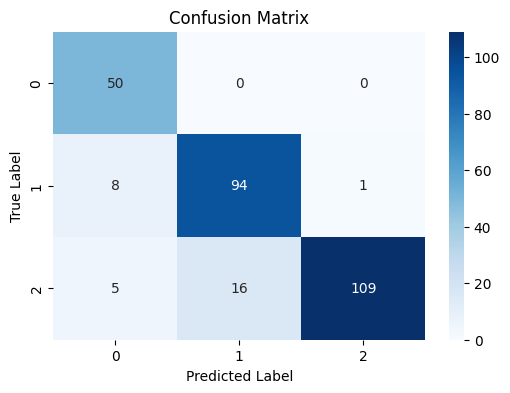

In [438]:
from sklearn.metrics import classification_report, confusion_matrix

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [439]:
# Extract feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Use the feature names from your dataset
    'Importance': dt_model.feature_importances_
})

# Sort by importance (descending)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


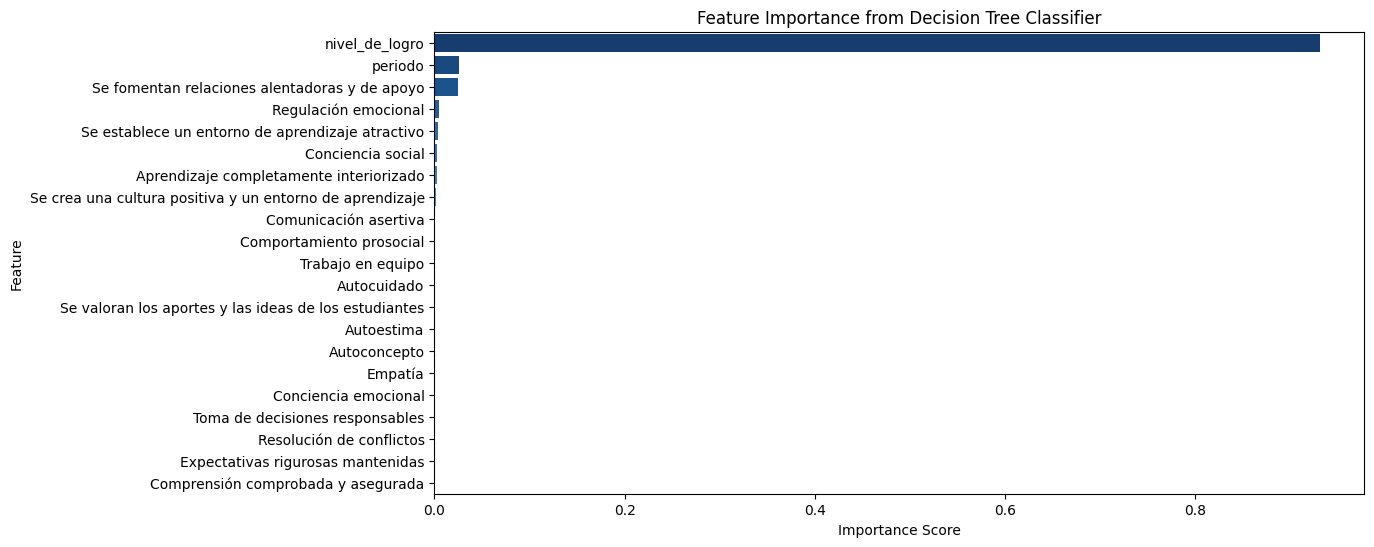

In [440]:
# Plot Feature Importance correctly
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance['Importance'], 
            y=feature_importance['Feature'], 
            hue=feature_importance['Feature'],  # Assign hue
            palette="Blues_r", 
            legend=False)  # Disable legend

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree Classifier")
plt.show()

In [441]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8905
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        50
         1.0       0.85      0.91      0.88       103
         2.0       0.99      0.83      0.90       130

    accuracy                           0.89       283
   macro avg       0.88      0.91      0.89       283
weighted avg       0.90      0.89      0.89       283



In [443]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


c:\Users\jange\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:10:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8940
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        50
         1.0       0.85      0.91      0.88       103
         2.0       0.99      0.84      0.91       130

    accuracy                           0.89       283
   macro avg       0.88      0.92      0.89       283
weighted avg       0.91      0.89      0.89       283

